# SHAP: Explain Any Machine Learning model

<b>Explainability</b> in machine learning means that you can explain what happens in your model from input to output, make models transparent and reviewable by your stakeholders, as well as helps you to build better models.

<b>Explainability</b> is responsible for answering the behavior of an ML model in the most straightforward human language. The more complex models are, the harder it is to understand precisely how the inner mechanics impact the prediction. This is where solutions like SHAP (SHapley Additive exPlanations) come in handy. They aim to explain the behavior of your ML model. They help you to understand what input features drive the prediction result.

<b>Interpretability</b> is responsible for answering what the fundamental mechanics behind the ML method are. Highly interpretable models like linear regression provide the highest transparency, however, at the cost of performance. 

<img src="pic/1_XxuqFGK-hu4PlrYKSrPl3A.webp">

In [1]:
import shap
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# California Housing Prices
dataset = fetch_california_housing(as_frame = True)
X = dataset['data']
y = dataset['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Prepares a default instance of the random forest regressor
model = RandomForestRegressor()
# Fits the model on the data
model.fit(X_train, y_train)

RandomForestRegressor()

To compute SHAP values for the model, we need to create an Explainer object and use it to evaluate a sample or the full dataset:

In [2]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)

# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Exact explainer: 4129it [17:47,  3.84it/s]                          


## Global Explainability

We use Global explainability to describe the understanding of how the model works as a holistic view of its features and which features are important. You should note it is also known as feature importance. It is a technique for assigning score points to dependent variables based on how well they can predict your target variable. It essentially provides a list of features that contribute the most to the model decision across all predictions.

Importance estimation plays an essential role in predictive modeling, including providing insight into the data and the model and setting the stage for dimensionality reduction and feature selection, which can improve the efficiency and effectiveness of your model.

### Bar plot

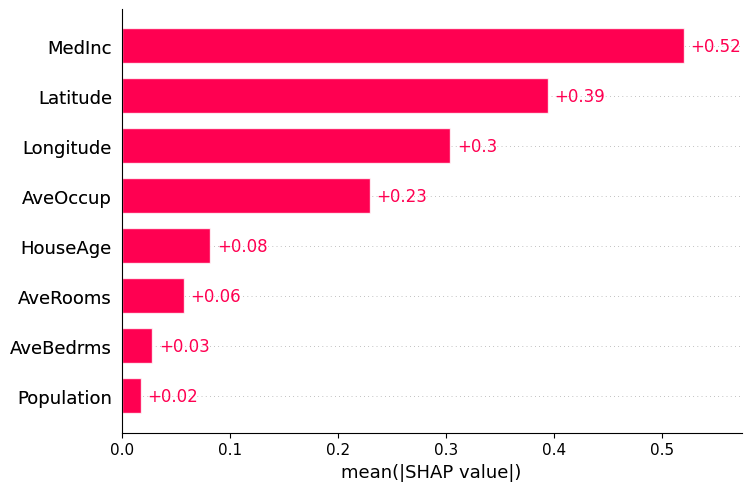

In [4]:
shap.plots.bar(shap_values)

Here the features are ordered from the highest to the lowest effect on the prediction. It takes in account the absolute SHAP value, so it does not matter if the feature affects the prediction in a positive or negative way.

### Summary plot: beeswarm

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


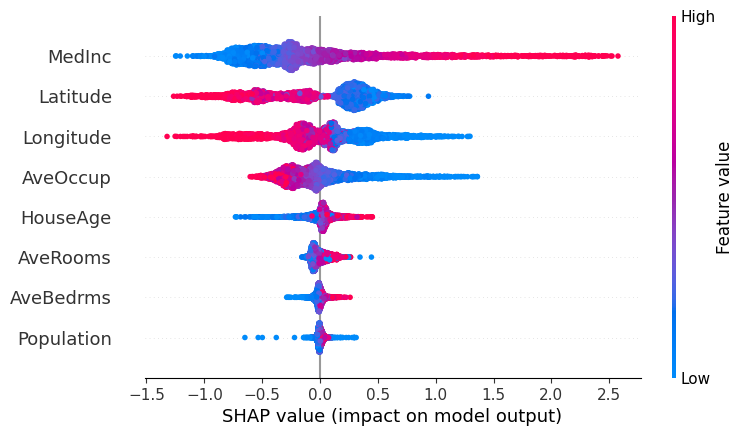

In [3]:
shap.plots.beeswarm(shap_values)

On the beeswarm the features are ordered by their effect on prediction, but we can also see how higher and lower values of the feature will affect the result.

All the little dots on the plot represent a single observation. The horizontal axis represents the SHAP value, while the color of the point shows us if that observation has a higher or a lower value, when compared to other observations.

### Summary plot: violin

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


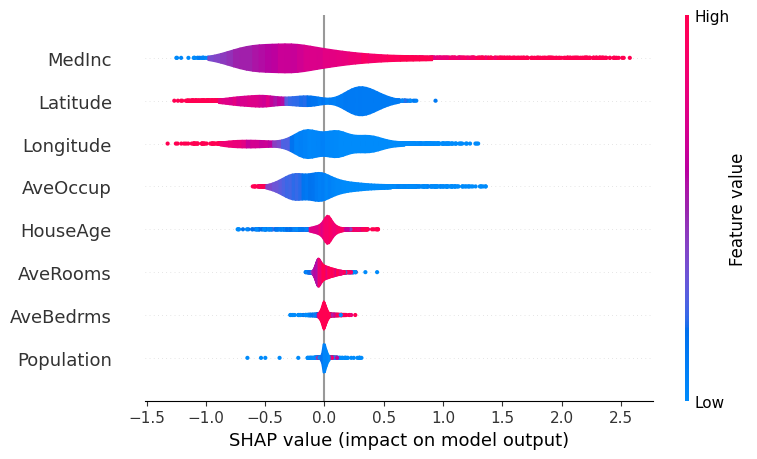

In [5]:
shap.summary_plot(shap_values, plot_type='violin')

## Local Explainability

Local explainability is concerned with explaining each individual prediction. It answers the question, what signals were the most impactful in the model decision for this particular case?

Local explainability comes in handy when your model is in production. It provides feedback on what’s happening across each inference and the opportunity to audit and troubleshoot your model.

### Local bar plot

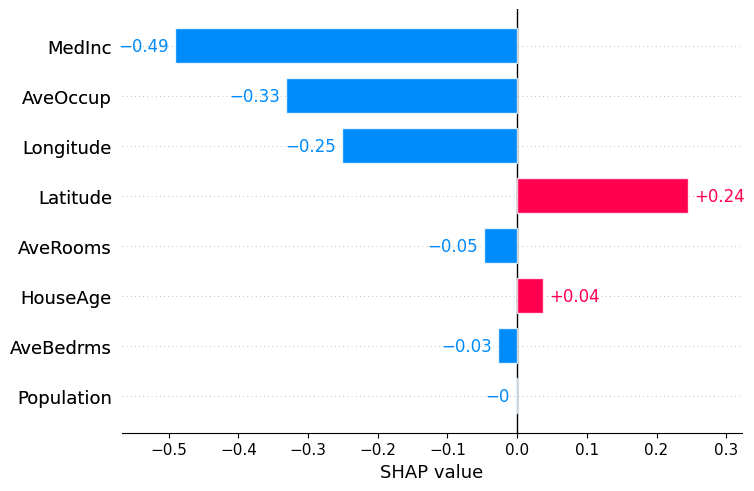

In [6]:
shap.plots.bar(shap_values[0])

This plot shows us what are the main features affecting the prediction of a single observation, and the magnitude of the SHAP value for each feature.

### Waterfall plot

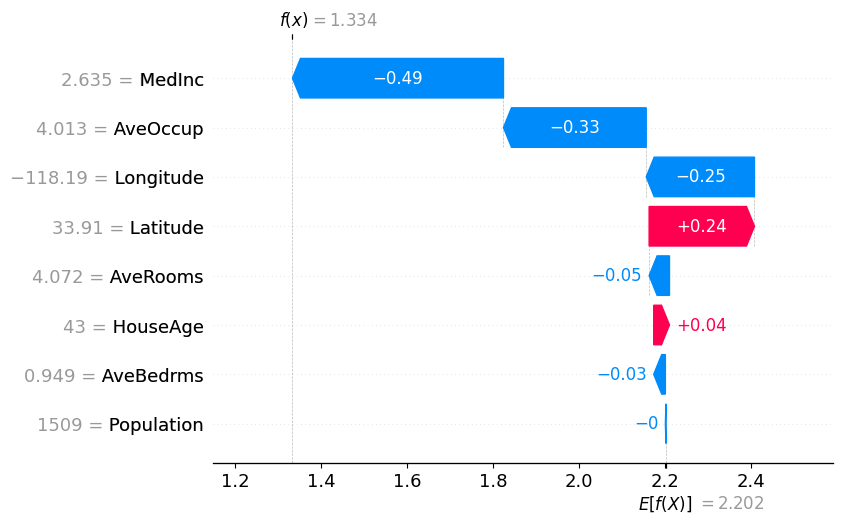

In [7]:
shap.plots.waterfall(shap_values[0])

The waterfall plot has the same information, represented in a different manner. Here we can see how the sum of all the SHAP values equals the difference between the prediction f(x) and the expected value E[f(x)].

### Force plot

In [9]:
shap.initjs()
shap.plots.force(shap_values[0])

The force plot is another way to see the effect each feature has on the prediction, for a given observation. In this plot the positive SHAP values are displayed on the left side and the negative on the right side, as if competing against each other. The highlighted value is the prediction for that observation.

## References

- [Explain Any Machine Learning Model in Python, SHAP](https://medium.com/@data.science.enthusiast/explain-any-machine-learning-model-in-python-shap-4caf1c343f3)

- [Using SHAP Values to Explain How Your Machine Learning Model Works](https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137)